# **Understanding and Implementing Advanced Recurrent Neural Networks (RNNs)**






## Part 1: Theoretical Foundations of Recurrent Neural Networks (RNNs)

### 1. Understanding RNN
- **Question:** What are Recurrent Neural Networks, and how do they differ from traditional feedforward neural networks?
- **Task:** Explain the working of RNN, and how information is passed through the network over time.

### 2. Stacking RNN Layers and Bi-directional Architecture
- **Question:** Discuss the advantages and potential drawbacks of stacking RNN layers. What are Bi-directional RNNs, and how do they enhance the performance of sequence models?
- **Task:** Explain when and why you would use stacked RNN layers and bi-directional RNNs in a sequence modeling task.

### 3. Hybrid Architecture
- **Question:** What is a hybrid architecture in the context of sequence modeling? Provide examples of how combining RNNs with other deep learning models can enhance performance.

### 4. Types of RNN:
- **Question:** List down types of RNN models and explain their structures and differences with RNN.


## Part 2: Practical Implementation of Basic RNN and its Advanced Variants

### 1. Implementing a Basic RNN Model
- **Task:** Using a dataset of your choice (e.g., text, time-series data), implement a basic RNN model. Train the model to perform a sequence task such as text generation, sentiment analysis, or time-series prediction.
- **Deliverable:** Perform this experimentation in a notebook and provide a detailed explanation or comments.

### 2. Stacking RNN Layers and Bi-directional RNNs
- **Task:** Modify your basic RNN model by stacking multiple RNN layers and also converting it into a bi-directional RNN. Analyze the performance improvement (if any) compared to the basic RNN model. (Note: Separate Implementation of Stacked RNN & Bi-Directional RNN)
- **Deliverable:** Perform this experimentation in a notebook and provide a detailed explanation or comments.

### 3. Exploring Hybrid Architectures
- **Task:** Implement a hybrid architecture by combining your RNN model with another model (e.g., CNN, Attention mechanism). Train this hybrid model on the same dataset and compare its performance with the previous models.
- **Deliverable:** Submit the Python code in a notebook for the hybrid model along with a report discussing the results, challenges faced, and the benefits (or drawbacks) observed.


In [ ]:
https://medium.com/@basitjawaid123/setting-up-aws-infrastructure-with-terraform-a-step-by-step-guide-0e157af6e268

https://www.google.com/search?q=free+deployment+depends+on+model+size&oq=free+deployment+depends+on+model+size&gs_lcrp=EgZjaHJvbWUyCwgAEEUYChg5GKABMgkIARAhGAoYoAHSAQg4NDg3ajBqNKgCALACAQ&client=ms-android-oppo-rvo3&sourceid=chrome-mobile&ie=UTF-8#ip=1

https://towardsdatascience.com/how-to-deploy-large-size-deep-learning-models-into-production-66b851d17f33

# Part 2:

## 1. Implementing a Basic RNN Model


TensorFlow Datasets (TFDS): https://www.tensorflow.org/datasets/catalog/tiny_shakespeare



#### Install and Import Necessary Libraries


In [ ]:
! pip install tensorflow datasets

In [ ]:
# Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#### Data Preparation


##### Load and Preprocess the Dataset


In [ ]:
# tfds.list_builders()

In [ ]:
# Loading the Tiny Shakespeare dataset
ds = tfds.load('tiny_shakespeare', split='train', as_supervised=False)

<_MapDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [ ]:
                        # Analyse Data

# Extracting only the text data from the dataset
text_ds = ds.map(lambda x: x['text'])


# Batching the dataset
# ds = ds.batch(1)  # Batch size 1 for loading text

# text_ds

# Concatenating all text into a single string
text = ''.join([t.decode('utf-8') for t in text_ds.as_numpy_iterator()])
# Print the length of the text
print(f'Length of text: {len(text)} characters')
print('\n')

# Let's look at the first 500 characters in text
print(text[:500])
print('\n')

# Unique characters in the text
vocab = sorted(set(text))    # Extracts and sorts the unique characters from the text
print('Number of unique characters:', len(vocab))
print('\n')
print('Vocabulary:', vocab)

Length of text: 1003854 characters
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor
Number of unique characters: 65
Vocabulary: ['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


##### Vectorize the text

  Convert the text from a sequence of characters to a sequence of numbers.

In [ ]:
# Initialize the tokenizer
tokenizer = Tokenizer(char_level=True, lower=False)  # char_level=True treats each character as a token
tokenizer.fit_on_texts([text])

# Step 1: Map characters to their indices in vocabulary
char2index = tokenizer.word_index

# Mapping index to character using the tokenizer
# index2char = {v: k for k, v in tokenizer.word_index.items()}

print('{')
for char, _ in zip(char2index, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2index[char]))
print('  ...\n}')

# Step 2: Map character indices to characters
index2char = {index: char for char, index in char2index.items()}
index2char_array = np.array([char for _, char in sorted(index2char.items())])

# Print the mapping
print('index2char array:', index2char_array)

# Step 3: Convert chars in text to indices
text_as_int = tokenizer.texts_to_sequences([text])[0]

# Print the length of text_as_int and the first 15 character mappings
print('text_as_int length: {}'.format(len(text_as_int)))
print('{} --> {}'.format(repr(text[:15]), repr(text_as_int[:15])))

In [ ]:
# Creating a Tokenizer (convert text to sequences of integers)
# tokenizer = Tokenizer(char_level=True)
tokenizer = Tokenizer(char_level=True, lower=False)  # char_level=True treats each character as a token
tokenizer.fit_on_texts([text])
total_chars = len(tokenizer.word_index) + 1    # extracts # vocab size (+1 for padding token because token indices are 1-based)
print('total_chars:', total_chars)
print('\n')

# Converting text to sequences
# sequences = tokenizer.texts_to_sequences([text])

text_as_int = tokenizer.texts_to_sequences([text])[0]
print('sequences:\n', text_as_int)
print('sequence length:\n', len(text_as_int))
print(f'{repr(text[:15])}  -->  {repr(text_as_int[:15])}')

Method2:
To convert the text from a sequence of characters to a sequence of numbers, we will detect all unique characters in the text, form a vocabulary out of it and replace each character with its index in the vocabulary.

In [ ]:
# # Map characters to their indices in vocabulary.
# char2index = {char: index for index, char in enumerate(vocab)}

# print('{')
# for char, _ in zip(char2index, range(20)):
#     print('  {:4s}: {:3d},'.format(repr(char), char2index[char]))
# print('  ...\n}')

# # Map character indices to characters from vocabulary.
# index2char = np.array(vocab)
# print(index2char)

# # Convert chars in text to indices.
# text_as_int = np.array([char2index[char] for char in text])

# print('text_as_int length: {}'.format(len(text_as_int)))
# print('{} --> {}'.format(repr(text[:15]), repr(text_as_int[:15])))


##### Create training sequences

In [ ]:
# Creating input sequences
max_sequence_len = 100    # The maximum length sentence we want for a single input in characters.
input_sequences = len(text) // (max_sequence_len + 1)
print('input_sequences_per_epoch:\n', input_sequences)

input_sequences_per_epoch:
 9939


In [ ]:
# Creating a dataset from the sequences
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for char in char_dataset.take(5):   # Displays the first 5 characters in the dataset
    print(index2char[char.numpy()])

F
i
r
s
t


In [ ]:
# Generating batched sequences out of the char_dataset
sequences_ds = char_dataset.batch(max_sequence_len + 1, drop_remainder=True)  # batches

# Sequences size
sequences_count = len(list(sequences_ds.as_numpy_iterator()))
print(f'Sequences count: {sequences_count}')
print()

# Displaying the first 5 sequences as examples
for item in sequences_ds.take(5):
    sequence_text = ''.join([index2char[char] for char in item.numpy()])
    print(repr(sequence_text))

Sequences count: 9939

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [ ]:

# Sequences shape:
# - Total number of sequences generated: 11043
# - Each sequence length: sequence_length+1 = 101 characters

In [ ]:
# Splitting sequences into input and target
def split_input_target(sequence_chunk):
    input_sequence = sequence_chunk[:-1]
    target_sequence = sequence_chunk[1:]
    return input_sequence, target_sequence

# Applying the split function to the dataset
split_dataset = sequences_ds.map(split_input_target)

# Dataset size is the same as input_sequence_per_epoch.
# Sequence's elemen  length is `max_sequence_length` not `max_sequence_length + 1`.
dataset_size = len(list(split_dataset.as_numpy_iterator()))
print('Dataset size: {}'.format(dataset_size))

# Displaying an first of input and target sequences
for input_seq, target_seq in split_dataset.take(1):
    print('Input sequence size:', repr(len(input_seq.numpy())))
    print('Target sequence size:', repr(len(target_seq.numpy())))
    print()
    print('Input:', repr(''.join([index2char[i] for i in input_seq.numpy()])))
    print('Target:', repr(''.join([index2char[i] for i in target_seq.numpy()])))

Dataset size: 9939
Input sequence size: 100
Target sequence size: 100

Input: 'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target: 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


##### Splitting Training Sequences into Batches



In [ ]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
BUFFER_SIZE = 10000

# Shuffle and batch the dataset
dataset = split_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Size of the batched dataset
print('Batched dataset size:', len(list(dataset.as_numpy_iterator())))

# Displaying the first batch of input and target sequences
for input_text, target_text in dataset.take(1):
    print('1st batch: input_text:', input_text)
    print()
    print('1st batch: target_text:', target_text)

Batched dataset size: 155
1st batch: input_text: tf.Tensor(
[[ 5 29  2 ... 13  1 16]
 [ 4 18  9 ...  6  1  7]
 [17 11 37 ... 11 43 16]
 ...
 [30  4  1 ...  3  4  1]
 [ 5  9 21 ...  1  3  4]
 [36 30 31 ...  2  2 13]], shape=(64, 100), dtype=int32)

1st batch: target_text: tf.Tensor(
[[29  2  1 ...  1 16  4]
 [18  9  1 ...  1  7  6]
 [11 37  2 ... 43 16  1]
 ...
 [ 4  1 20 ...  4  1 10]
 [ 9 21  2 ...  3  4  1]
 [30 31 35 ...  2 13  2]], shape=(64, 100), dtype=int32)


In [ ]:
# Dataset shape Summary

# Number of batches
num_batches = len(list(dataset.as_numpy_iterator()))

# Each batch contains 64 sequences
sequences_per_batch = BATCH_SIZE

# Each sequence is a tuple of 2 sub-sequences of length 100
sequence_length = max_sequence_l

print(f"Dataset shape:")
print(f"- Number of batches: {num_batches}")
print(f"- Sequences per batch: {sequences_per_batch}")
print(f"- Each sequence is a tuple of 2 sub-sequences of length {sequence_length} (input_text and target_text)")

Dataset shape:
- Number of batches: 155
- Sequences per batch: 64
- Each sequence is a tuple of 2 sub-sequences of length 100 (input_text and target_text)


#### RNN Model Building

  Using the Functional API

In [ ]:

# 1. Model Configuration

# Batch size
# BATCH_SIZE=64
# Vocabulary size in characters
# vocab_size = len(vocab)
vocab_size = total_chars

# Model parameters
embedding_dim = 256
rnn_units = 1024


# 2. Model Definition

# Function to build the RNN model
# def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
#     model = tf.keras.Sequential([
#         tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, batch_input_shape=[batch_size, None]),
#         tf.keras.layers.SimpleRNN(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_normal'),
#         tf.keras.layers.Dense(vocab_size)
#     ])
#     return model

In [ ]:
import tensorflow as tf

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    inputs = tf.keras.Input(shape=(None,), batch_size=batch_size, name='input_layer')
    x = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)
    x = tf.keras.layers.SimpleRNN(units=rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_normal')(x)
    outputs = tf.keras.layers.Dense(vocab_size, name='output_layer')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Define model parameters
# vocab_size = 65  # Example vocab size
# embedding_dim = 256
# rnn_units = 1024
# batch_size = 64



In [ ]:
# Instantiate and summarize the model
model = build_model(vocab_size, embedding_dim, rnn_units, BATCH_SIZE)
# model.build(tf.TensorShape([1, None]))

# Model summary
model.summary()   # (batch_size, sequence_length, vocab_size)

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (64, None)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_27 (Embedding)             │ (64, None, 256)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_18 (SimpleRNN)            │ (64, None, 1024)            │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (64, None, 66)              │          67,650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,396,290 (5.33 MB)

 Trainable params: 1,396,290 (5.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling the model

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(loss=loss, optimizer=adam_optimizer, metrics=['accuracy'])

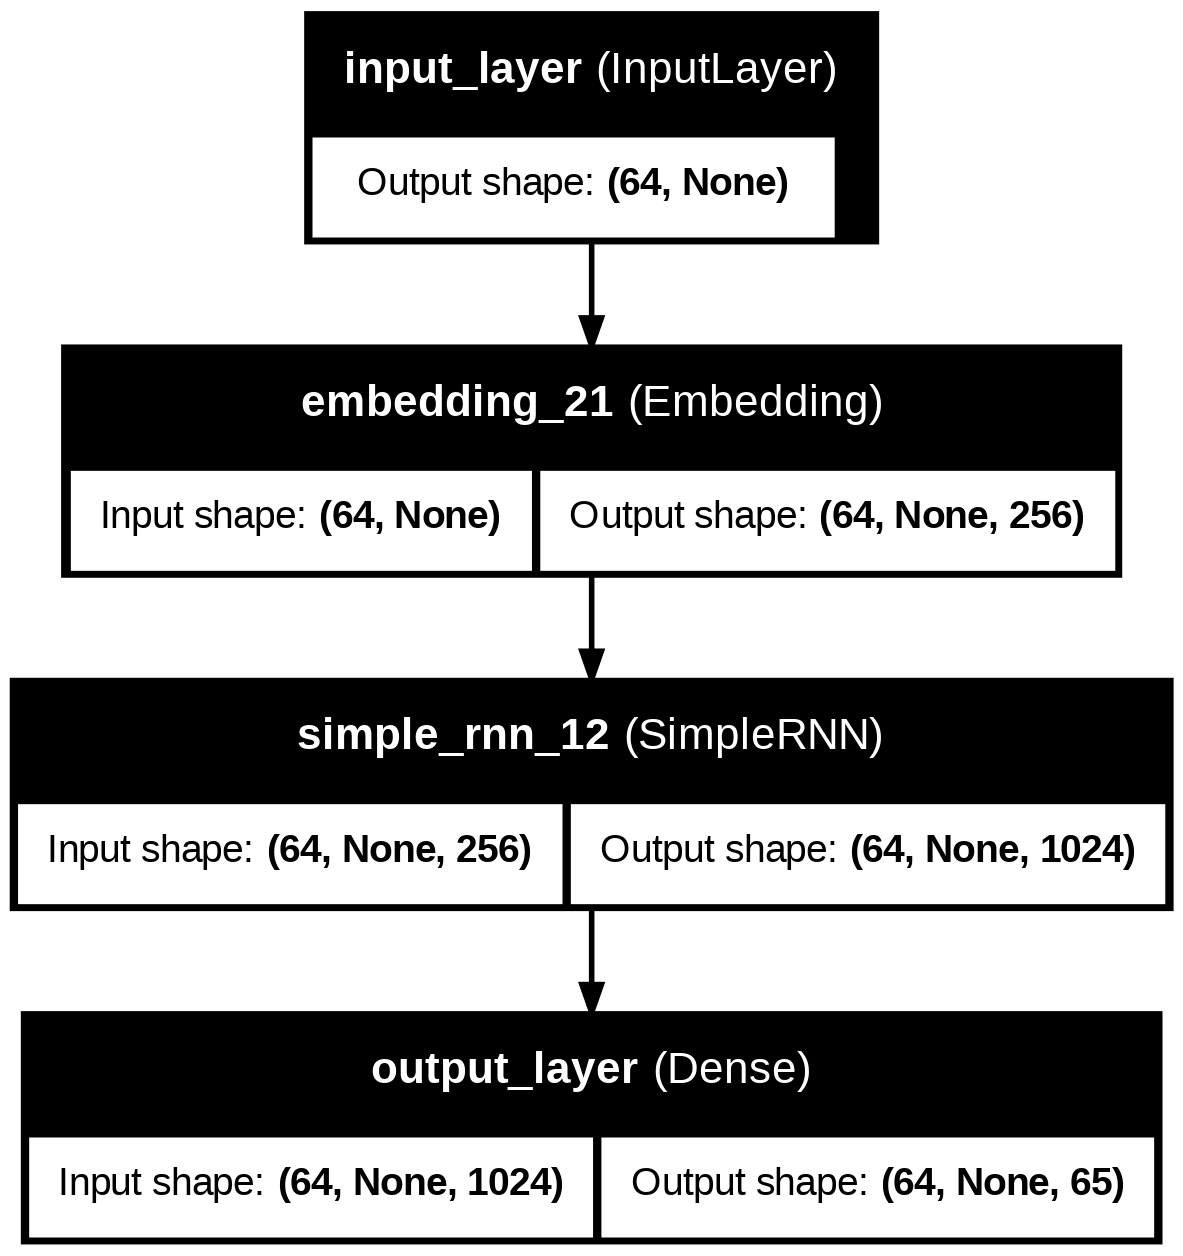

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

#### Train the model


In [ ]:
# Training the model
history = model.fit(
  x=dataset,
  epochs=5,
  verbose=1

)

#### Text Generation

After training, we can generate new text based on a seed string.

Epoch 1/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.2470 - loss: 2.7286
Epoch 2/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.3920 - loss: 2.0738
Epoch 3/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.4296 - loss: 1.9250
Epoch 4/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.4515 - loss: 1.8396
Epoch 5/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - accuracy: 0.4693 - loss: 1.7779
Epoch 6/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.4794 - loss: 1.7407
Epoch 7/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - accuracy: 0.4882 - loss: 1.7078
Epoch 8/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.4951 - loss: 1.6836
Epoch 9/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - accuracy: 0.4999 - loss: 1.6641
Epoch 10/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.5037 - loss: 1.6477


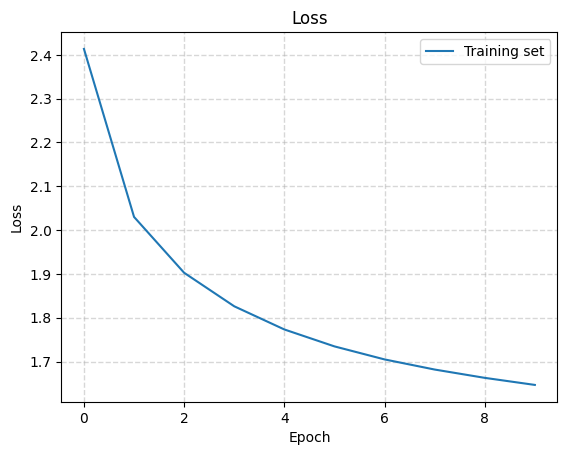

Dataset shape:
- Number of batches: 245
- Sequences per batch: 64
- Each sequence is a tuple of 2 sub-sequences of length 100 (input_text and target_text)


In [ ]:


# Parameters
BATCH_SIZE = 64
BUFFER_SIZE = 10000
embedding_dim = 128
max_sequence_length = 100  # Example sequence length

# Load and preprocess the Tiny Shakespeare dataset
ds = tfds.load('tiny_shakespeare', split='train')
ds = ds.map(lambda x: (tf.strings.unicode_split(x['text'], input_encoding='UTF-8'), x['text']))
ds = ds.map(lambda x, y: (tf.strings.reduce_join(x), y))  # Join characters back to text

# ds = ds.batch(1)  # Batch size 1 for loading text

# Extract the text
text = ""
for text_batch, _ in ds:
    text = text_batch.numpy()[0].decode('utf-8')
    break  # Only take the first batch for now

# Initialize the tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts([text])

# Convert text to sequences
text_as_int = tokenizer.texts_to_sequences([text])[0]

# Create dataset
def create_dataset(text_as_int, batch_size, seq_length):
    sequences = tf.data.Dataset.from_tensor_slices(text_as_int)
    sequences = sequences.batch(batch_size, drop_remainder=True)
    dataset = sequences.map(lambda x: (x[:-1], x[1:]))  # Use shifted sequences for training
    dataset = dataset.shuffle(BUFFER_SIZE).batch(batch_size, drop_remainder=True)
    return dataset

dataset = create_dataset(text_as_int, BATCH_SIZE, max_sequence_length)

# Model definition
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.Dense(len(tokenizer.word_index) + 1)
])

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model
history = model.fit(dataset, epochs=10, verbose=1)

# Visualize training history
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

render_training_history(history)

# Dataset shape summary
num_batches = len(list(dataset.as_numpy_iterator()))
sequences_per_batch = BATCH_SIZE
sequence_length = max_sequence_length

print(f"Dataset shape:")
print(f"- Number of batches: {num_batches}")
print(f"- Sequences per batch: {sequences_per_batch}")
print(f"- Each sequence is a tuple of 2 sub-sequences of length {sequence_length} (input_text and target_text)")



In [ ]:
# Generate text function
def generate_text(model, tokenizer, start_string, num_generate=1000, temperature=1.0):
    # Convert start string to sequence of integers
    input_indices = tokenizer.texts_to_sequences([start_string])[0]
    input_indices = tf.expand_dims(input_indices, 0)

    # Empty string to store our results
    text_generated = []

    # Here batch size == 1
    # model.reset_states()
    for _ in range(num_generate):
        predictions = model(input_indices)
        predictions = tf.squeeze(predictions, 0)

        # Apply temperature to predictions
        predictions = predictions / temperature

        # Sample from predictions
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        # Pass the predicted character as the next input
        input_indices = tf.expand_dims([predicted_id], 0)

        # Append the character to the generated text
        text_generated.append(tokenizer.index_word.get(predicted_id, ''))

    return start_string + ''.join(text_generated)

# Generate text with default temperature (1.0)
print("Generated Text with default temperature (1.0):")
print(generate_text(model, tokenizer, start_string="ROMEO: "))

# Generate text with higher temperature (1.5)
print("\nGenerated Text with higher temperature (1.5):")
print(generate_text(model, tokenizer, start_string="ROMEO: ", temperature=1.5))


Generated Text with default temperature (1.0):
ROMEO: isel anathe:
s,
rselendr fespplan.
me, itep he sane hed:
or ckar rsale, y sinanepet swath d inaldo an fonthe the eweralan thedrre llere.
y:
pr ifrit onobit d w'laf mad tumo chay osongerowone tli wapialtho wous eres be marshalad wife
jugegabre fll, he igr shar:
y ded pporouro?
s
s shexith, hithel, avorinonen wh mo te we s k? d d antontith, the ar leth thaghouncadr. st fomo---
k.
rar thale:
t moucrus.
mad cacine'dad;
tharagema cuthe&d.
on:
mexes mor ivepr so d. lisimang brithake no, l, ers ldon thiithe othe m s fo n.
bousoncan icrd th metr mar ho his maled th:
fulince maned mor veny t the mith, pealan hasthyor wheleererindowitheth: f t igore wend?
kendgar otet.
w sth, wourss nd ourotind'do; y:
wanifolad bre nelith seliro, s:
t bl. ixomou f s hars t hid, teresizat where t ourotaly abran om hofowa ghe thido.
nqushadwarorin fo mourisichithad cust thestironcheditherenld watrrrollvery chit sefamon! g't s, eend, fune etat izers thelame pate

#### Save the Model

In [ ]:
model_name = 'text_generation_shakespeare_rnn.h5'
model.save(model_name, save_format='h5')

## 2. Stacking RNN Layers and Bi-directional RNNs


{
  ' ' :   1,
  'e' :   2,
  't' :   3,
  'o' :   4,
  'a' :   5,
  'h' :   6,
  's' :   7,
  'r' :   8,
  'n' :   9,
  'i' :  10,
  '\n':  11,
  'l' :  12,
  'd' :  13,
  'u' :  14,
  'm' :  15,
  'y' :  16,
  ',' :  17,
  'w' :  18,
  'f' :  19,
  'c' :  20,
  ...
}
index2char array: [' ' 'e' 't' 'o' 'a' 'h' 's' 'r' 'n' 'i' '\n' 'l' 'd' 'u' 'm' 'y' ',' 'w'
 'f' 'c' 'g' 'I' 'b' 'p' ':' 'v' '.' 'A' 'k' 'T' 'E' "'" 'O' 'N' 'R' 'S'
 'L' 'C' ';' 'W' 'U' 'H' 'M' 'B' 'G' '?' 'D' '!' 'F' '-' 'Y' 'K' 'P' 'V'
 'j' 'q' 'x' 'z' 'J' 'Q' 'Z' 'X' '3' '&' '$']
text_as_int length: 1003854
'First Citizen:\n' --> [49, 10, 8, 7, 3, 1, 38, 10, 3, 10, 58, 2, 9, 25, 11]
Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.2134 - loss: 3.1119
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.3720 - loss: 2.2094
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.4098 - loss: 2.0399
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.4376 - lo

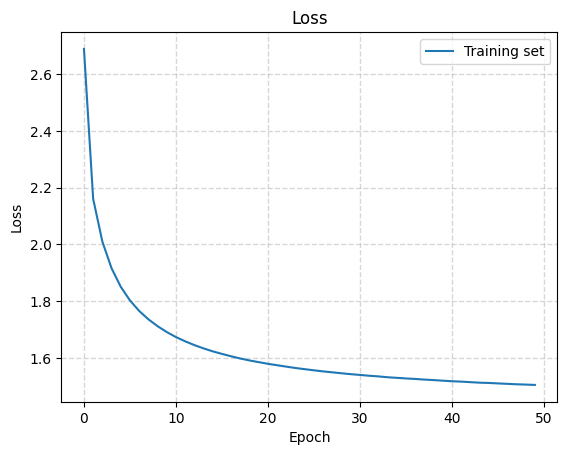

Dataset shape:
- Number of batches: 155
- Sequences per batch: 64
- Each sequence is a tuple of 2 sub-sequences of length 100 (input_text and target_text)


In [ ]:


# Parameters
BATCH_SIZE = 64
BUFFER_SIZE = 10000
embedding_dim = 128
max_sequence_length = 100  # Example sequence length

# Load and preprocess the Tiny Shakespeare dataset
ds = tfds.load('tiny_shakespeare', split='train')
ds = ds.map(lambda x: x['text'])  # Extract only the text data

# Concatenate all text into one large string
text = ""
for text_batch in ds.as_numpy_iterator():
    text += text_batch.decode('utf-8')  # Decode each text part

# Initialize the tokenizer
tokenizer = Tokenizer(char_level=True, lower=False)  # char_level=True treats each character as a token
tokenizer.fit_on_texts([text])

# Step 1: Map characters to their indices in vocabulary
char2index = tokenizer.word_index

print('{')
for char, _ in zip(char2index, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2index[char]))
print('  ...\n}')

# Step 2: Map character indices to characters
index2char = {index: char for char, index in char2index.items()}
index2char_array = np.array([char for _, char in sorted(index2char.items())])

# Print the mapping
print('index2char array:', index2char_array)

# Step 3: Convert chars in text to indices
text_as_int = tokenizer.texts_to_sequences([text])[0]

# Print the length of text_as_int and the first 15 character mappings
print('text_as_int length: {}'.format(len(text_as_int)))
print('{} --> {}'.format(repr(text[:15]), repr(text_as_int[:15])))

# Create dataset
def create_dataset(text_as_int, batch_size, seq_length):
    sequences = tf.data.Dataset.from_tensor_slices(text_as_int)
    sequences = sequences.batch(seq_length + 1, drop_remainder=True)
    dataset = sequences.map(lambda x: (x[:-1], x[1:]))  # Use shifted sequences for training
    dataset = dataset.shuffle(BUFFER_SIZE).batch(batch_size, drop_remainder=True)
    return dataset

dataset = create_dataset(text_as_int, BATCH_SIZE, max_sequence_length)

# Model definition
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.Dense(len(tokenizer.word_index) + 1)
])

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model
history = model.fit(dataset, epochs=50, verbose=1)

# Visualize training history
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

render_training_history(history)

# Dataset shape summary
num_batches = len(list(dataset.as_numpy_iterator()))
sequences_per_batch = BATCH_SIZE
sequence_length = max_sequence_length

print(f"Dataset shape:")
print(f"- Number of batches: {num_batches}")
print(f"- Sequences per batch: {sequences_per_batch}")
print(f"- Each sequence is a tuple of 2 sub-sequences of length {sequence_length} (input_text and target_text)")


In [ ]:
# Function to generate text
def generate_text(model, start_string, num_generate=1000, temperature=1.0):
    """
    Generates text using a trained model.

    Parameters:
    - model: The trained model used for generating text.
    - start_string: The initial string to start generating text from.
    - num_generate: The number of characters to generate.
    - temperature: Controls the randomness of predictions by scaling logits before applying softmax.
                   Lower values make the output more predictable.

    Returns:
    - A string containing the start_string followed by generated text.
    """

    # Convert start string to indices using the tokenizer's char2index mapping
    input_indices = tokenizer.texts_to_sequences([start_string])[0]
    input_indices = tf.expand_dims(input_indices, 0)  # Add batch dimension

    # Empty list to store the generated text
    text_generated = []

    # Reset the model's states before starting the generation process
    # model.reset_states()

    for char_index in range(num_generate):
        # Get predictions from the model
        predictions = model(input_indices)

        # Remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # Adjust predictions based on the temperature setting
        predictions = predictions / temperature

        # Predict the next character using a categorical distribution
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        # Pass the predicted character's index as the next input to the model
        input_indices = tf.expand_dims([predicted_id], 0)

        # Convert predicted_id back to a character using the index2char mapping and append to generated text
        text_generated.append(index2char[predicted_id])

    # Combine the start string with the generated characters
    return start_string + ''.join(text_generated)

# Generate and print text starting with "ROMEO: "
print(generate_text(model, start_string="ROMEO: "))


ROMEO: IUS:
RTy wit y hedse pan t, noul 'R:
DUS norsw shef t I'd mene mpled y, gee yong Co, s tir heses stal. arulde IUCK:
Whe, tin hethy bitanifoneanondid Ange d ar
MENRY d crorsen, sord tht iresare,
IUCHoly, welotowingoumy, hid osevot ye!
BERI oly handst,
CE'der;
IUS
Sed niscee,
INESur d ar at ld the nde-IUCHAst ale th hine panirag west at:
PENCHBy, beld, the pre s leatheat fon'd.
BUS.
Acouft tr t is mof arour!
Fingr hessthamivoun t bow urethinag aknd thitr an? ry fe, manedenid tee th sepathe?
YONCUCEdscar, bry oreat couho.
Alakit, minge irit taugeds:
BES y t; ole s.
Thalipllfry't cigares igres, ll m n D ranit nt he wors mat
Clver y atharse s be wacul mpand n IO:
Ed ar wit, hant fr I'd sh y werdu n t thir, lise mil te't,
BO:
Tyound I n lupame:
Trire et, he a w be t, is s,
INI bl pi cownors s,
Hand ondidice of pare prsth, t ishomy totst, ton he! smoly t gathavedipory bale doweroutin x: hilog hourer At didarshind t?
Warsthece my inglle nedin ISe y I thysquly, ndip.
JOMIUCLBurselele tof

In [ ]:
# Generate text with different temperature settings
print("Generated text with temperature 0.5:")
print(generate_text(model, start_string="ROMEO: ", temperature=0.5))

print("Generated text with temperature 1.0:")
print(generate_text(model, start_string="ROMEO: ", temperature=1.0))

print("Generated text with temperature 1.5:")
print(generate_text(model, start_string="ROMEO: ", temperature=1.5))


Generated text with temperature 0.5:
ROMEO: INEm at t thersthithtoulome t within t are t the the is the f me ll thes th me t roushe the I ho are thed t he the me the theld athing ly t allanand are he me ofr bouse hilithof she melis, sed d gour par hes ban t be w, be wh, the fre d s t s mersthed ne the t se hollit t wis thedswhesthe he he llathe ted g we whe y wireshe hake thof than t he t ar mars she ond be I thenge stherelin are the If I t the s t lithe winowe wige are thoulonde I t he d t winde bust bonge s beares l, he s.
O:
O:
I me t t d ng t I y I hethe he choure s there mall hit br hars t ire houre t t t, st he he houre ban e thand thes, heloulonchen tounononed hellly he ds bouthond the the f hined wes y bothe belor arede malllll be m thin wit m se be I thon he te t we wef on the CARARWhed make t he wit be, n thin the bol minourstho me me t it in horousthon st dses thane ly horelll the the bul helathe on or
ENINCHout t:
I at me me the the s t t t, bre t housthe toure an t f t s b